<h1>Dados Covid-19</h1>

<p>Dados obtidos do site <a href="https://brasil.io">Brasil.io</a>. O qual disponibiliza não apenas os dados como também documentação, diversas visualizações dos dados, uma API de acesso, código fonte de tudo além de boa documentação.</p>

<p>URL direta dos dados: <a href="https://brasil.io/dataset/covid19/files/">https://brasil.io/dataset/covid19/files/</a>.</p>

<p>Data de download: 02/03/2021</p>

<h2>Pré-processamento</h2>
<p>Criar, alterar, ou adicionar dados que nos permitam mehorar o processamento, melhorando a consistência, completude, confiabilidade e o conjunto de dados mais fácil de ser interpretado.<p>

<p>Carga dos dados.</p>

In [1]:
arquivo <- "caso.csv"

if (! file.exists(arquivo)) {
  url <- "https://data.brasil.io/dataset/covid19/caso.csv.gz"
  download.file(url, destfile = arquivo, method = "curl")
  untar('caso.csv.gz')
}

dados <- read.csv(arquivo, header = TRUE, stringsAsFactors = FALSE)

<p>Vamos manter apenas os dados dos municípios do estado do Rio de Janeiro e vamos remover colunas que não serão utilizadas: <i>state</i> (é sempre <i>RJ</i>), <i>place_type</i> (é sempre <i>city</i>) e <i>estimated_population_2019</i> (desatualizada)</p>

<p>Além disso, retirar os <i>Importados/Indefinidos</i>:</p>

In [2]:
dados <- dados[dados$state == "RJ" & dados$place_type == "city", ]
dados <- dados[ , - c(2, 4, 9)] # state, place_type, estimated_population_2019
dados <- dados[dados$city != "Importados/Indefinidos", ]

<h4>Número de mortes por dia</h4>
<p>Vamos criar um novo atributo com o número de mortes por dia:</p>

In [3]:
dados$deaths_day <- 0

municipios <- sort(unique(dados$city))

for (municipio in municipios) {
  indices <- sort(dados[dados$city == municipio, "order_for_place"])
  acumulado <- 0
  for (indice in indices) {
    mortes_no_dia <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"] - acumulado
    dados[dados$city == municipio & dados$order_for_place == indice, "deaths_day"] <- mortes_no_dia
    acumulado <- dados[dados$city == municipio & dados$order_for_place == indice, "deaths"]
  }
}

<p>Em R deve ser possível fazer sem usar dois laços (um <i>for</i> dentro do outro). Ainda vou tentar descobrir como...</p>

<p>Ficou tudo certo? Ficou algum número negativo?</p>

In [4]:
any(dados$deaths_day < 0)

[1] TRUE

<p>Eita! Será que eu errei no código? Vejamos os dados:</p>

In [5]:
dados[dados$deaths_day < 0,]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
798778,2021-02-25,Angra dos Reis,10868,346,329,False,207044,3300100,5249.12579,0.0318,-1
798978,2020-08-06,Angra dos Reis,3976,119,129,False,207044,3300100,1920.36475,0.0299,-1
799039,2020-06-05,Angra dos Reis,1081,41,68,False,207044,3300100,522.11124,0.0379,-1
799705,2020-06-07,Araruama,219,28,66,False,134293,3300209,163.07626,0.1279,-1
799829,2021-01-13,Areal,328,9,272,False,12669,3300225,2588.99676,0.0274,-1
800340,2020-07-14,Armação dos Búzios,188,8,92,False,34477,3300233,545.29106,0.0426,-2
800892,2020-11-16,Barra Mansa,3874,181,247,False,184833,3300407,2095.94607,0.0467,-1
801025,2020-07-04,Barra Mansa,567,35,114,False,184833,3300407,306.76340,0.0617,-1
801509,2021-02-14,Belford Roxo,16796,426,322,False,513118,3300456,3273.32115,0.0254,-1
801574,2020-12-09,Belford Roxo,11657,360,257,False,513118,3300456,2271.79713,0.0309,-1


<p>Vamos olhar um exemplo e ver os dados originais para um exemplo, o próprio registro e uns antes:</p>

In [6]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67),]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
799704,2020-06-08,Araruama,219,28,67,False,134293,3300209,163.0763,0.1279,0
799705,2020-06-07,Araruama,219,28,66,False,134293,3300209,163.0763,0.1279,-1
799706,2020-06-06,Araruama,163,29,65,False,134293,3300209,121.3764,0.1779,1
799707,2020-06-05,Araruama,160,28,64,False,134293,3300209,119.1425,0.1750,0


<p>Ficou difícil de ver, vamos melhorar isso, vendo só algumas colunas:</p>

In [7]:
dados[dados$city == "Araruama" & dados$order_for_place %in% c(64, 65, 66, 67), c(1,2,4,11)]

,date,city,deaths,deaths_day
799704,2020-06-08,Araruama,28,0
799705,2020-06-07,Araruama,28,-1
799706,2020-06-06,Araruama,29,1
799707,2020-06-05,Araruama,28,0


<p>Do dia <i>2020-06-06</i> para o dia <i>2020-06-07</i> alguém ressucitou!!! Aleluia!</p>

<p>Ou os dados não são confiáveis... Talvez não por culpa do pessoal do Brasil.io, mas sim das secretarias de saúde.</p>

<p>Qual o pior caso?</p>

In [8]:
dados[dados$deaths_day == min(dados$deaths_day),]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
814814,2020-12-24,Niterói,22420,675,282,False,515317,3303302,4350.72,0.0301,-111


<p>Cento e onze ressucitaram no mesmo dia! Vamos ver mais detalhes:</p>

In [9]:
dados[dados$city == "Niterói" & dados$order_for_place %in% c(281, 282, 283), c(1,2,4,11)]

,date,city,deaths,deaths_day
814813,2020-12-25,Niterói,675,0
814814,2020-12-24,Niterói,675,-111
814815,2020-12-23,Niterói,786,121


<p>Sem muito o que fazer, eu vou manter assim mesmo. Quem quiser pode zerar todos os negativos com o seguinte comando:</p>
<p><i>dados[dados$deaths_day < 0, "deaths_day"] <- 0</i></p>

<p>Como ficaram os dados?</p>

In [10]:
min(dados$deaths_day)

max(dados$deaths_day)

[1] -111

[1] 307

<p>Nada como um gráfico para ver como ficou o novo dado:</p>

<p>Primeiro carregando a biblioteca necessária:</p>

In [11]:
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<p>Agora sim o gráfico:</p>

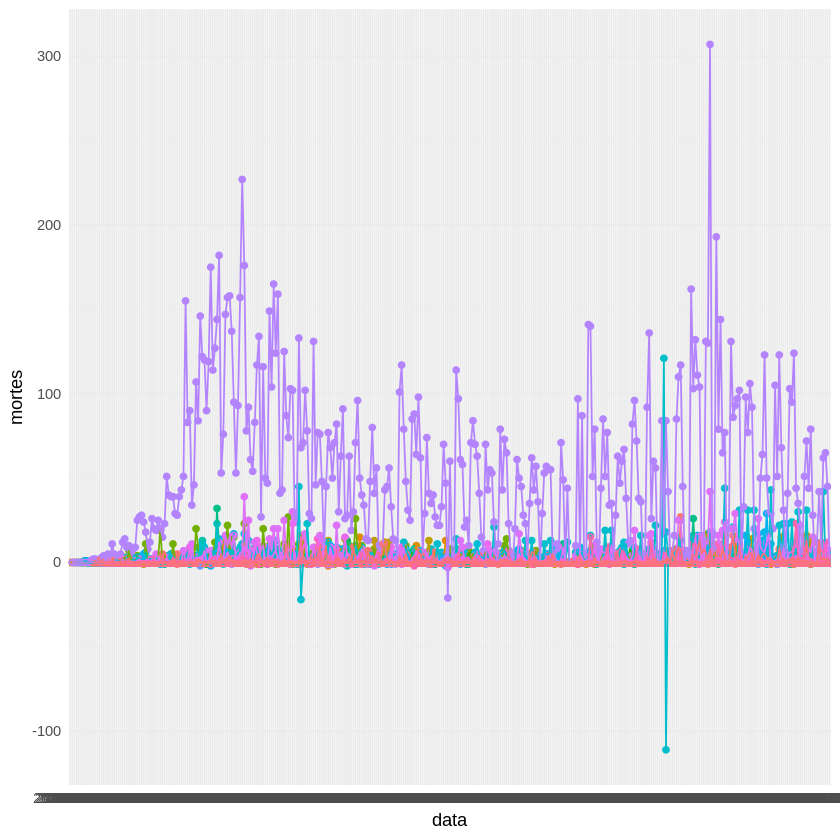

In [12]:
ggplot(dados, aes(x=date, y=deaths_day, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes") +
  theme_minimal()

<p>Um único município passa de 200 mortes/dia (duas vezes) e com frequência passa de 100. A maioria não chega nem perto de 50 mortes/dia (ainda bem).</p>

<p>Que município é esse?</p>

In [13]:
dados[dados$deaths_day > 200,]

,date,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_day
821579,2021-01-16,Rio de Janeiro,179478,16101,305,False,6747815,3304557,2659.794,0.0897,307
821802,2020-06-03,Rio de Janeiro,32951,4055,82,False,6747815,3304557,488.321,0.1231,227


<p>Rio de Janeiro.</p>

<h4>Número de mortes/dia 100k habitantes</h4>
<p>Seria melhor se todos fossem medidos com uma mesma escala. Para comparar o número de mortes por dia de duas cidades (uma grande e uma pequena, por exemplo), é melhor dividir pelo tamanho da população. Os dados já trazem uma coluna que usa isso <i>confirmed_per_100k_inhabitants</i>, vamos algo parecido para o número de mortes por dia:</p>

In [14]:
dados$deaths_day_per_100k_inhabitants <- 100000 * dados$deaths_day / dados$estimated_population

<p>Vejamos como ficou:</p>

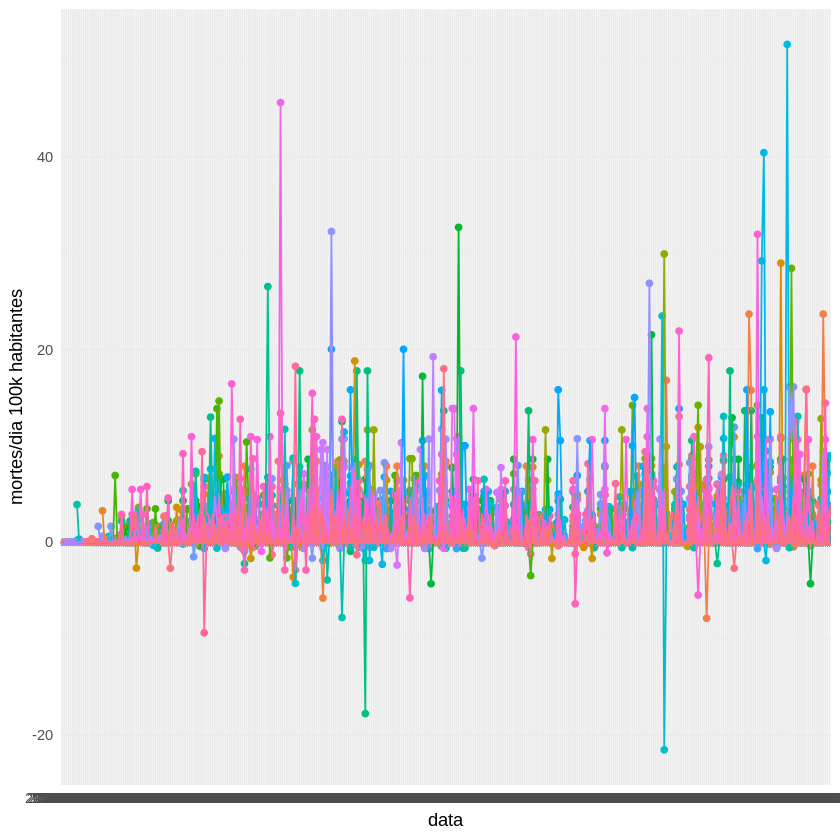

In [15]:
ggplot(dados, aes(x=date, y=deaths_day_per_100k_inhabitants, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes/dia 100k habitantes") +
  theme_minimal()

<p>Parece melhor.</p>

<h4>Padronização por z-score - número de mortes/dia 100k habitantes</h4>
<p>Padronização por z-score, por município:</p>
<p>$z = \frac{x - \mu}{\sigma}$</p>
<p>Onde: $\mu$ é a média, e $\sigma$ é o desvio padrão.</p>

In [16]:
dados$deaths_day_100k_zscore <- 0
for (municipio in municipios) {
  media <- mean(dados[dados$city == municipio, "deaths_day_per_100k_inhabitants"], na.rm = TRUE)
  desvio_padrao <- sd(dados[dados$city == municipio, "deaths_day_per_100k_inhabitants"], na.rm = TRUE)
  dados[dados$city == municipio, "deaths_day_100k_zscore"] <- ((dados[dados$city == municipio, "deaths_day_per_100k_inhabitants"] - media) / desvio_padrao)
}

<p>Como ficaram os dados?</p>

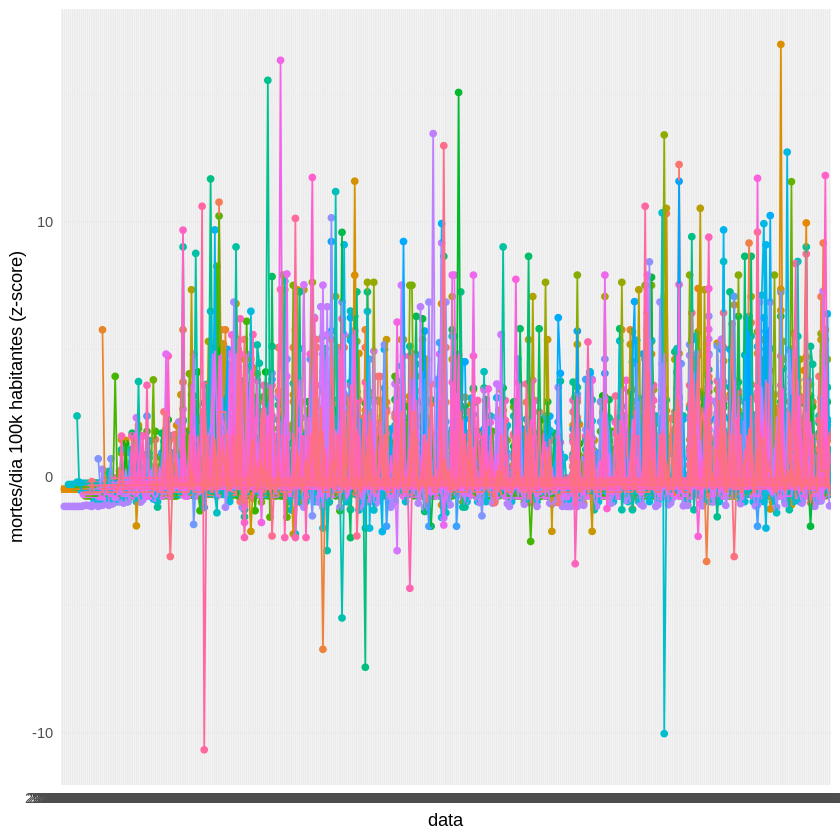

In [17]:
ggplot(dados, aes(x=date, y=deaths_day_100k_zscore, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes/dia 100k habitantes (z-score)") +
  theme_minimal()

<h4>Transformando no formato de entrada desejado:</h4>

In [18]:
# atributos e registros
municipios <- sort(unique(dados$city))
datas <- as.character(sort(unique(dados$date)))

# define o formato do conjunto de dados
linhas <- length(datas)
colunas <- length(municipios)

D <- array(0, dim=c(linhas, colunas))

# nomes para as linhas e colunas
rownames(D) <- datas
colnames(D) <- municipios

# dados do numero de mortes de cada municipio para determinada data
for (municipio in municipios) {
  for (data in datas) {
    dado <- 0
    registro <- dados[dados$city==municipio & dados$date == data, ]
    if (nrow(registro) > 0) {
      dado <- dados[dados$city==municipio & dados$date == data, "deaths_day_100k_zscore"]
    }
    D[data, municipio] <- dado
  }
}

<p>Como ficou:</p>

In [19]:
D

,Angra dos Reis,Aperibé,Araruama,Areal,Armação dos Búzios,Arraial do Cabo,Barra do Piraí,Barra Mansa,Belford Roxo,Bom Jardim,...,Silva Jardim,Sumidouro,Tanguá,Teresópolis,Trajano de Moraes,Três Rios,Valença,Varre-Sai,Vassouras,Volta Redonda
2020-03-05,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-06,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-08,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-12,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-15,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-16,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-18,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-19,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-21,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000
2020-03-22,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,-0.4658775,0.0000000,0.00000000,...,0,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0,0,0.0000000


<h4>Dividindo em intervalos e discretizando</h4>

In [20]:
minimo <- min(D)
maximo <- max(D)
numero_intervalos <- 10
quebras <- seq(from = minimo, to = maximo, length = numero_intervalos + 1)

t <- cut(D, breaks = quebras, labels = letters[1:numero_intervalos], include.lowest=TRUE)
D <- matrix(t, nrow = nrow(D), ncol = ncol(D))

D <- as.data.frame(D, stringsAsFactors=FALSE)
rownames(D) <- datas
colnames(D) <- municipios

<p>Como ficou:</p>

In [21]:
D

,Angra dos Reis,Aperibé,Araruama,Areal,Armação dos Búzios,Arraial do Cabo,Barra do Piraí,Barra Mansa,Belford Roxo,Bom Jardim,...,Silva Jardim,Sumidouro,Tanguá,Teresópolis,Trajano de Moraes,Três Rios,Valença,Varre-Sai,Vassouras,Volta Redonda
2020-03-05,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-06,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-08,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-12,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-15,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-16,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-18,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-19,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-21,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d
2020-03-22,d,d,d,d,d,d,d,d,d,d,...,d,d,d,d,d,d,d,d,d,d


<h4>Média de mortes por semana</h4>
<p>Que tal a média de mortes por semana? Vamos fazer:</p>

<p>Primeiro todos tem de ter o mesmo numero de datas</p>

In [22]:
# seleciona apenas colunas de interesse
temp <- dados[ , c(1,2,11)] # date, city, deaths_day

# todas as datas que existem no conjunto de dados
datas <- sort(unique(temp$date))

linha <- nrow(temp)
for (municipio in municipios) {
  for (data in datas) {
    if (nrow(temp[temp$city == municipio & temp$date == data,]) == 0) {
      linha <- linha + 1
      temp[(linha), "date"] <- data
      temp[(linha), "city"] <- municipio
      temp[(linha), "deaths_day"] <- 0 
    }
  }
}

<p>Funcionou? Todos tem o mesmo número de datas?</p>

In [23]:
nrow(temp) / length(datas) == length(municipios)

[1] TRUE

<p>Semanal por municipio</p>

In [24]:
temp$week <- 0

# Para cada data o numero de sua semana
for (municipio in municipios) {
  i <- 0
  for (data in datas) {
    temp[temp$city == municipio & temp$date == data, "week"] <- as.integer(i / 7) + 1
    i <- i + 1
  }
}

# Semanas, cidades e média de mortes de cada semana:
semanal <- data.frame(week = 0, city = "", mean_deaths_week = 0, stringsAsFactors = FALSE)

semanas <- sort(unique(temp$week))

i <- 1
for (municipio in municipios) {
  for (semana in semanas) {
    total <- sum(temp[temp$city == municipio & temp$week == semana, "deaths_day"])
    linhas <- nrow(temp[temp$city == municipio & temp$week == semana, ])
    semanal[i, "week"] <- semana
    semanal[i, "city"] <- municipio
    semanal[i, "mean_deaths_week"] <- total / linhas
    i<- i + 1
  }
}

<p>Deu certo? Vejamos:</p>

In [25]:
any(semanal$mean_deaths_week < 0)

[1] TRUE

<p>Pouco provável que seja negativa a média de mortes em uma semana...</p>

In [26]:
semanal[semanal$mean_deaths_week < 0, ]

,week,city,mean_deaths_week
200,44,Areal,-0.1428571
226,18,Armação dos Búzios,-0.1428571
526,6,Bom Jesus do Itabapoana,-0.1428571
637,13,Cachoeiras de Macacu,-0.1428571
1368,16,Guapimirim,-0.1428571
1663,51,Itaocara,-0.1428571
2073,45,Mangaratiba,-0.1428571
3293,17,Rio Bonito,-0.1428571
3305,29,Rio Bonito,-0.1428571
3770,26,São Gonçalo,-0.2857143


<p>Poucas ocorrências... Em cidades pequenas, pode acontecer...</p>
<p>Vamos pegar dois exemplos:</p>

In [27]:
temp[temp$city == "Areal" & temp$week == 44,]
temp[temp$city == "São Gonçalo" & temp$week == 26,]

,date,city,deaths_day,week
799826,2021-01-18,Areal,0,44
799827,2021-01-17,Areal,0,44
799828,2021-01-16,Areal,0,44
799829,2021-01-13,Areal,-1,44
799830,2021-01-12,Areal,0,44
799831,2021-01-11,Areal,0,44
799832,2021-01-10,Areal,0,44


,date,city,deaths_day,week
825061,2020-09-12,São Gonçalo,-1,26
825062,2020-09-11,São Gonçalo,-2,26
825063,2020-09-10,São Gonçalo,0,26
825064,2020-09-09,São Gonçalo,1,26
825065,2020-09-08,São Gonçalo,0,26
825066,2020-09-07,São Gonçalo,0,26
825067,2020-09-06,São Gonçalo,0,26


<p>É... aconteceu. Sem problemas!</p>

<p>Vejamos o gráfico:</p>

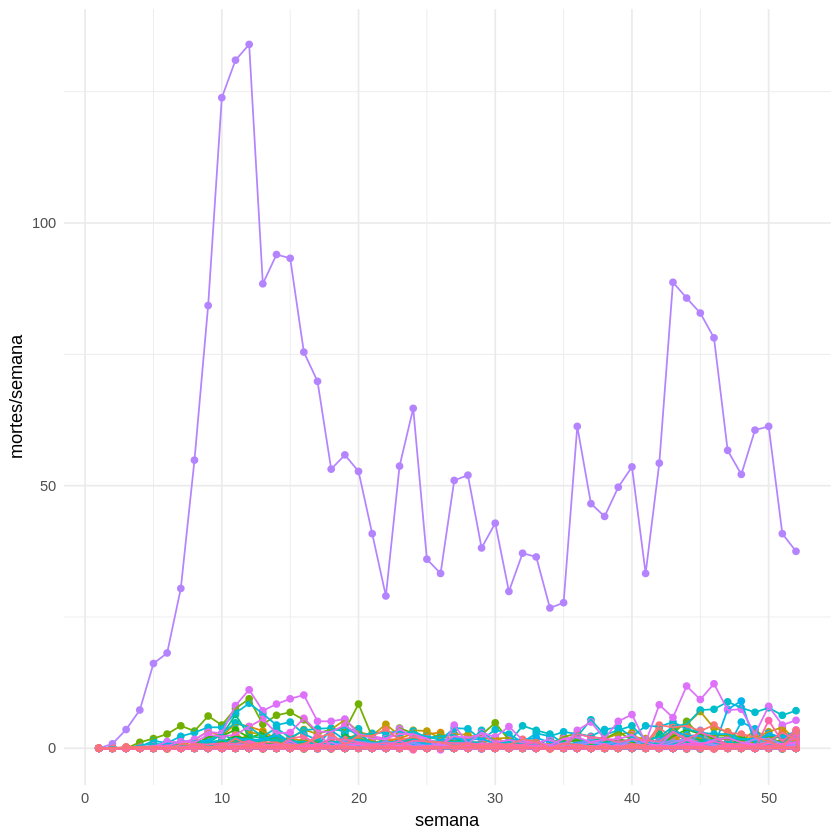

In [28]:
ggplot(semanal, aes(x=week, y=mean_deaths_week, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "semana", y = "mortes/semana") +
  theme_minimal()

<p>A maior média deve ser do Rio de Janeiro, então vamos retirá-lo para ver melhor os outros:</p>

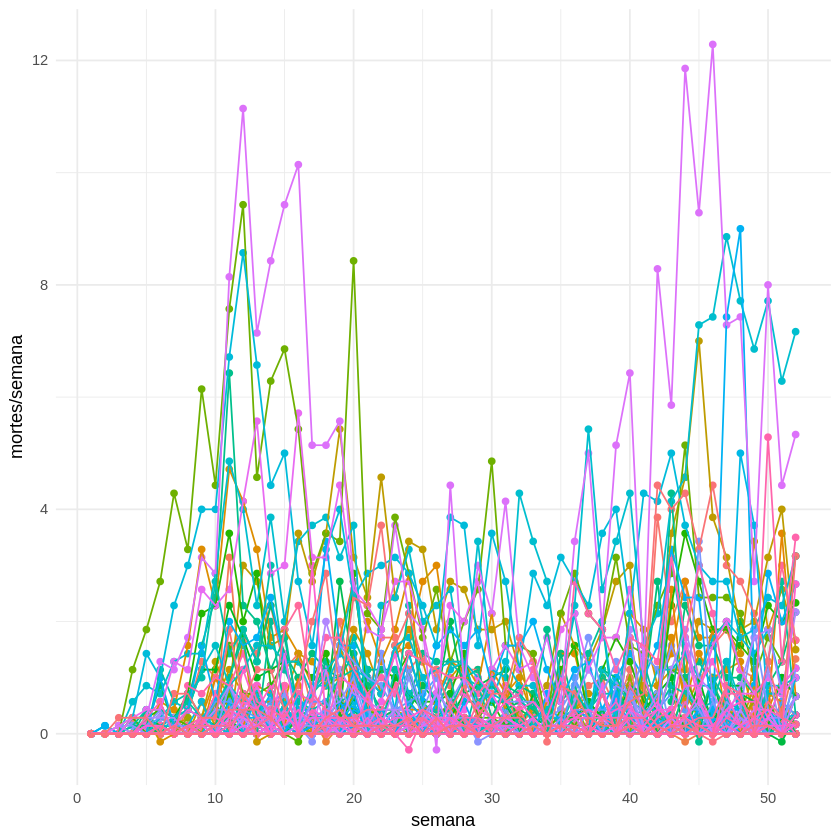

In [29]:
ggplot(semanal[semanal$city != "Rio de Janeiro",], aes(x=week, y=mean_deaths_week, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "semana", y = "mortes/semana") +
  theme_minimal()

<h4>Média de mortes por semana por 100k habitantes</h4>

In [30]:
semanal$mean_deaths_week_100k_inhabitants <- 0
for (municipio in municipios) {
  populacao <- unique(dados[dados$city == municipio, "estimated_population"])
  semanal[semanal$city == municipio, "mean_deaths_week_100k_inhabitants"] <- 100000 * semanal[semanal$city == municipio, "mean_deaths_week"] / populacao
}

<p>O gráfico:</p>

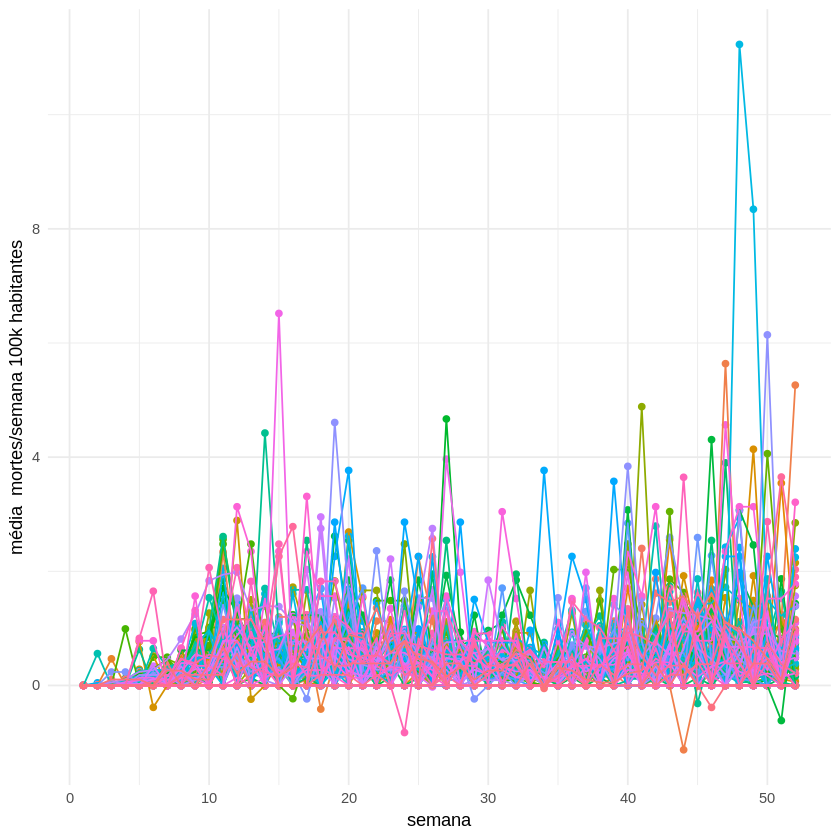

In [31]:
ggplot(semanal, aes(x=week, y=mean_deaths_week_100k_inhabitants, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "semana", y = "média  mortes/semana 100k habitantes") +
  theme_minimal()

<h4>Padronização por z-score para a média de mortes por semana por 100k habitantes</h4>

In [32]:
semanal$mean_deaths_week_100k_zscore <- 0
for (municipio in municipios) {
  media <- mean(semanal[semanal$city == municipio, "mean_deaths_week_100k_inhabitants"], na.rm = TRUE)
  desvio_padrao <- sd(semanal[semanal$city == municipio, "mean_deaths_week_100k_inhabitants"], na.rm = TRUE)
  semanal[semanal$city == municipio, "mean_deaths_week_100k_zscore"] <- ((semanal[semanal$city == municipio, "mean_deaths_week_100k_inhabitants"] - media) / desvio_padrao)
}

<p>O gráfico:</p>

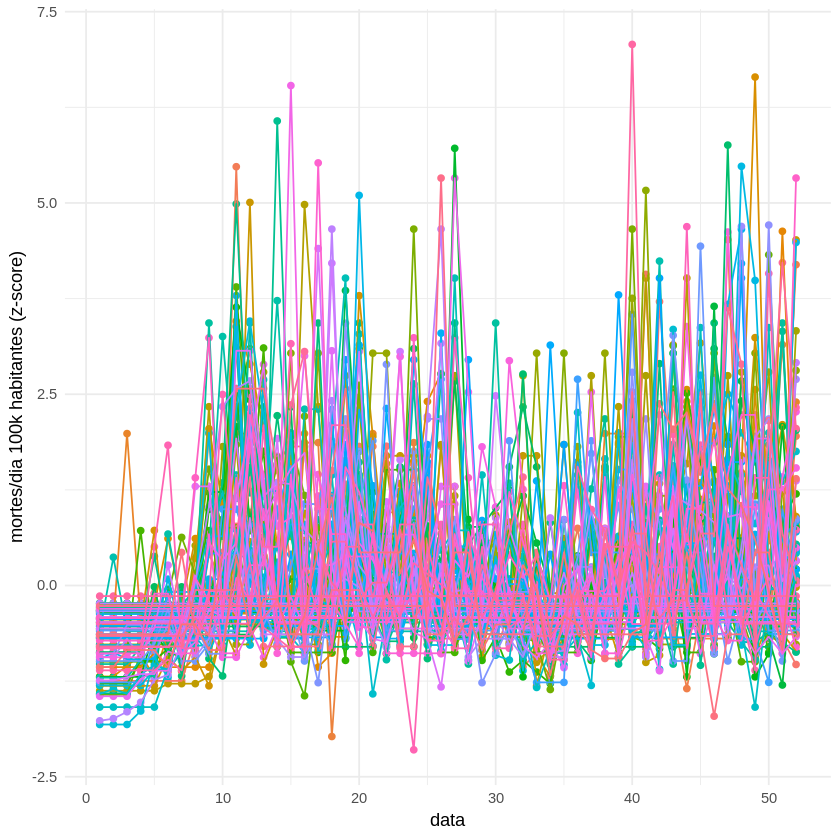

In [33]:
ggplot(semanal, aes(x=week, y=mean_deaths_week_100k_zscore, group=city)) +
  geom_point(aes(color=city), show.legend = FALSE) +
  geom_line(aes(color=city), show.legend = FALSE) +
  labs(x = "data", y = "mortes/dia 100k habitantes (z-score)") +
  theme_minimal()

<h4>Transformando no formato de entrada desejado:</h4>

In [34]:
# atributos e registros
municipios <- sort(unique(semanal$city))
semanas <- sort(unique(semanal$week))

# define o formato do conjunto de dados
linhas <- length(semanas)
colunas <- length(municipios)

D <- array(0, dim=c(linhas, colunas))

# nomes para as linhas e colunas
rownames(D) <- semanas
colnames(D) <- municipios

# dados do numero de mortes de cada municipio para determinada data
for (municipio in municipios) {
  for (semana in semanas) {
    D[semana, municipio] <- semanal[semanal$city==municipio & semanal$week == semana, "mean_deaths_week_100k_zscore"]
  }
}

<p>Como ficou?</p>

In [35]:
D

Angra dos Reis,Aperibé,Araruama,Areal,Armação dos Búzios,Arraial do Cabo,Barra do Piraí,Barra Mansa,Belford Roxo,Bom Jardim,...,Silva Jardim,Sumidouro,Tanguá,Teresópolis,Trajano de Moraes,Três Rios,Valença,Varre-Sai,Vassouras,Volta Redonda
-1.24702419,-0.4326311,-0.64344548,-0.3698171,-0.6935981,-0.4825135,-0.67145528,-1.06707872,-1.18909775,-0.2485878,...,-0.4222815,-0.4989250,-0.8208522,-1.10941637,-0.138675,-0.6597811,-0.79690163,-0.2689389,-0.6380719,-1.06534784
-1.24702419,-0.4326311,-0.64344548,-0.3698171,-0.6935981,-0.4825135,-0.67145528,-1.06707872,-1.18909775,-0.2485878,...,-0.4222815,-0.4989250,-0.8208522,-1.10941637,-0.138675,-0.6597811,-0.79690163,-0.2689389,-0.6380719,-1.06534784
-1.24702419,-0.4326311,-0.64344548,-0.3698171,-0.6935981,1.9854244,-0.67145528,-1.06707872,-1.04835477,-0.2485878,...,-0.4222815,-0.4989250,-0.8208522,-1.10941637,-0.138675,-0.6597811,-0.79690163,-0.2689389,-0.6380719,-0.84338555
-1.24702419,-0.4326311,-0.64344548,-0.3698171,-0.6935981,-0.4825135,-0.67145528,-1.06707872,-0.90761179,-0.2485878,...,-0.4222815,-0.4989250,-0.8208522,-1.10941637,-0.138675,-0.6597811,-0.79690163,-0.2689389,-0.6380719,-0.84338555
-1.24702419,-0.4326311,-0.36539148,-0.3698171,-0.6935981,-0.4825135,-0.24737826,-0.88435174,-1.18909775,-0.2485878,...,-0.4222815,-0.4989250,0.5061213,-1.10941637,-0.138675,-0.6597811,-0.79690163,-0.2689389,-0.6380719,-0.84338555
-1.24702419,-0.4326311,-0.64344548,-0.3698171,-0.6935981,-0.4825135,-0.45941677,-1.06707872,-0.62612583,0.6131832,...,-0.4222815,-0.4989250,1.8330948,-0.96922281,-0.138675,-0.6597811,-0.79690163,-0.2689389,-0.6380719,-1.06534784
-1.24702419,-0.4326311,-0.64344548,-0.3698171,-0.6935981,-0.4825135,-0.67145528,-1.06707872,-0.76686881,-0.2485878,...,-0.4222815,-0.4989250,-0.8208522,-1.10941637,-0.138675,-0.6597811,-0.79690163,-0.2689389,0.4322422,-0.51044212
-0.69619142,-0.4326311,-0.36539148,-0.3698171,-0.6935981,-0.4825135,-0.67145528,-1.06707872,0.35907504,0.6131832,...,1.4076051,-0.4989250,-0.8208522,-0.26825499,-0.138675,-0.4274428,-0.05911733,-0.2689389,-0.6380719,-0.51044212
0.40547412,-0.4326311,-0.64344548,-0.3698171,-0.6935981,1.9854244,-0.24737826,-1.06707872,2.04799081,-0.2485878,...,3.2374916,-0.4989250,-0.1573655,-0.40844855,-0.138675,-0.6597811,-0.05911733,-0.2689389,-0.6380719,-0.84338555
0.03825228,-0.4326311,-0.36539148,-0.3698171,-0.6935981,-0.4825135,0.81281428,0.21201015,1.06278995,-0.2485878,...,-0.4222815,-0.4989250,2.4965816,-0.12806143,-0.138675,-0.6597811,-0.05911733,-0.2689389,0.4322422,-0.84338555


<h4>Dividindo em intervalos e discretizando</h4>

In [36]:
minimo <- min(D)
maximo <- max(D)
numero_intervalos <- 10
quebras <- seq(from = minimo, to = maximo, length = numero_intervalos + 1)

t <- cut(D, breaks = quebras, labels = letters[1:numero_intervalos], include.lowest=TRUE)
D <- matrix(t, nrow = nrow(D), ncol = ncol(D))

D <- as.data.frame(D, stringsAsFactors=FALSE)
rownames(D) <- semanas
colnames(D) <- municipios

<p>Como ficou?</p>

In [37]:
D

Angra dos Reis,Aperibé,Araruama,Areal,Armação dos Búzios,Arraial do Cabo,Barra do Piraí,Barra Mansa,Belford Roxo,Bom Jardim,...,Silva Jardim,Sumidouro,Tanguá,Teresópolis,Trajano de Moraes,Três Rios,Valença,Varre-Sai,Vassouras,Volta Redonda
a,b,b,b,b,b,b,b,b,c,...,b,b,b,b,c,b,b,c,b,b
a,b,b,b,b,b,b,b,b,c,...,b,b,b,b,c,b,b,c,b,b
a,b,b,b,b,e,b,b,b,c,...,b,b,b,b,c,b,b,c,b,b
a,b,b,b,b,b,b,b,b,c,...,b,b,b,b,c,b,b,c,b,b
a,b,b,b,b,b,c,b,b,c,...,b,b,c,b,c,b,b,c,b,b
a,b,b,b,b,b,b,b,b,c,...,b,b,e,b,c,b,b,c,b,b
a,b,b,b,b,b,b,b,b,c,...,b,b,b,b,c,b,b,c,c,b
b,b,b,b,b,b,b,b,c,c,...,d,b,b,c,c,b,c,c,b,b
c,b,b,b,b,e,c,b,e,c,...,f,b,c,b,c,b,c,c,b,b
c,b,b,b,b,b,d,c,d,c,...,b,b,f,c,c,b,c,c,c,b
